In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

Resources:

- source for World borders https://www.geoboundaries.org/

- EPSG website: https://epsg.io/


In [2]:
# # TODOSy
# - powiedziec o scianieciu danych
# - Platte Carre wylatuje
# - ale pokazac stopnie/metry - niech dla nich tez sie liczy powierzchnia

In [3]:
import os
os.chdir(r'd:\git20\GeoPython_Ukraine2024')

# todo download and unzip
https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip

In [4]:
# read data about the countries
r'd:\GIS\2024_workshops\geoBoundariesCGAZ_ADM0.shp'

gdf_countries = gpd.read_file(r'd:\GIS\2024_workshops\geoBoundariesCGAZ_ADM0.shp')

In [5]:
gdf_countries

,shapeGroup,shapeType,shapeName,geometry
0,AFG,ADM0,Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314..."
1,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34..."
2,ALB,ADM0,Albania,"POLYGON ((20.07889 42.55580, 20.07928 42.55546..."
3,DZA,ADM0,Algeria,"POLYGON ((8.64194 36.94096, 8.64195 36.94070, ..."
4,USA,ADM0,United States,"MULTIPOLYGON (((-168.15791 -14.53181, -168.161..."
...,...,...,...,...
213,126,DISP,Sanafir & Tiran Is.,"MULTIPOLYGON (((34.69143 27.95899, 34.69176 27..."
214,127,DISP,Senkakus,"POLYGON ((123.47986 25.75070, 123.48736 25.749..."
215,128,DISP,Spratly Is,"POLYGON ((114.33955 11.44331, 114.33958 11.440..."
216,129,DISP,West Bank,"POLYGON ((35.55500 32.38936, 35.55517 32.38919..."


In [6]:
gdf_countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

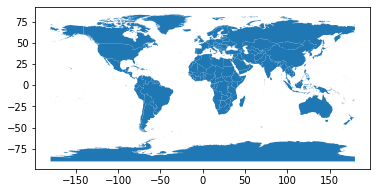

In [7]:
gdf_countries.plot()

In [8]:
gdf_countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shapeGroup  218 non-null    object  
 1   shapeType   218 non-null    object  
 2   shapeName   218 non-null    object  
 3   geometry    218 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 6.9+ KB


In [9]:
gdf_countries.geometry

0      POLYGON ((74.88986 37.23409, 74.88962 37.23314...
1      MULTIPOLYGON (((33.01302 34.64377, 33.01275 34...
2      POLYGON ((20.07889 42.55580, 20.07928 42.55546...
3      POLYGON ((8.64194 36.94096, 8.64195 36.94070, ...
4      MULTIPOLYGON (((-168.15791 -14.53181, -168.161...
                             ...                        
213    MULTIPOLYGON (((34.69143 27.95899, 34.69176 27...
214    POLYGON ((123.47986 25.75070, 123.48736 25.749...
215    POLYGON ((114.33955 11.44331, 114.33958 11.440...
216    POLYGON ((35.55500 32.38936, 35.55517 32.38919...
217    POLYGON ((-8.66761 27.66727, -8.66761 27.62671...
Name: geometry, Length: 218, dtype: geometry

In [ ]:
gdf_countries.plot()

In [10]:
gdf_countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

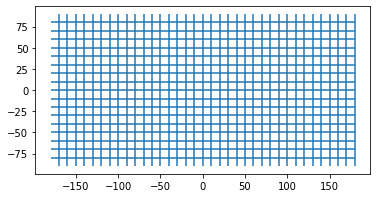

In [12]:
# (r'.\data\graticules_10.shp')
gdf_graticules = gpd.read_file(r'data\graticules_10.shp')
gdf_graticules.plot()

(-198.0, 198.0000000000001, -99.0, 99.0)

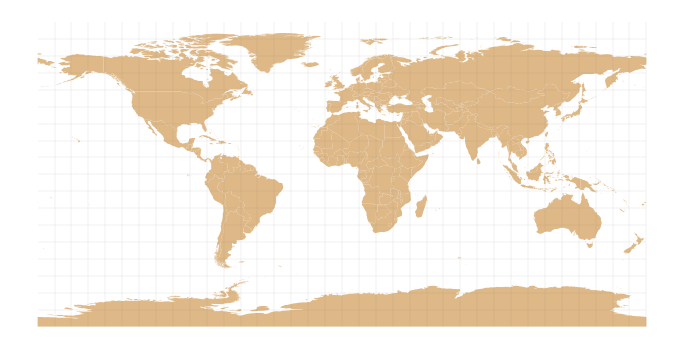

In [28]:
fig, ax = plt.subplots(figsize=(12,10))
gdf_countries.plot(ax=ax, color='burlywood')
gdf_graticules.plot(ax=ax, color='gray', linewidth=0.1)
ax.axis('off')

Text(0.5, 1.0, 'WGS84')

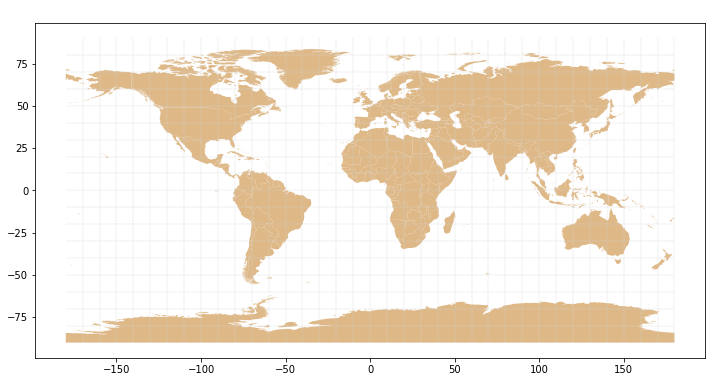

In [30]:
# overlay - fig and ax objects

fig, ax = plt.subplots(figsize=(12,10))
gdf_countries.plot(ax=ax, color='burlywood')
gdf_graticules.plot(ax=ax, color='lightgray', linewidth=0.3)
plt.title('WGS84', color='white')
# ax.axis('off')

Mercator projection 'EPSG:3857'

(-22041259.17706817, 22041259.17706818, -266781549.038117, 266781549.038117)

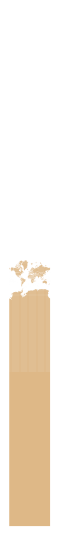

In [15]:
gdf_world_mercator = gdf_countries.to_crs('EPSG:3857')
graticules_mercator = gdf_graticules.to_crs('EPSG:3857')
# gdf_world_mercator.plot(figsize=(12,30))

fig, ax = plt.subplots(figsize=(12,10))
gdf_world_mercator.plot(ax=ax, color='burlywood')
graticules_mercator.plot(ax=ax, color='white', linewidth=0.1)
ax.axis('off')

Text(0.5, 1.0, 'World Mercator Projection')

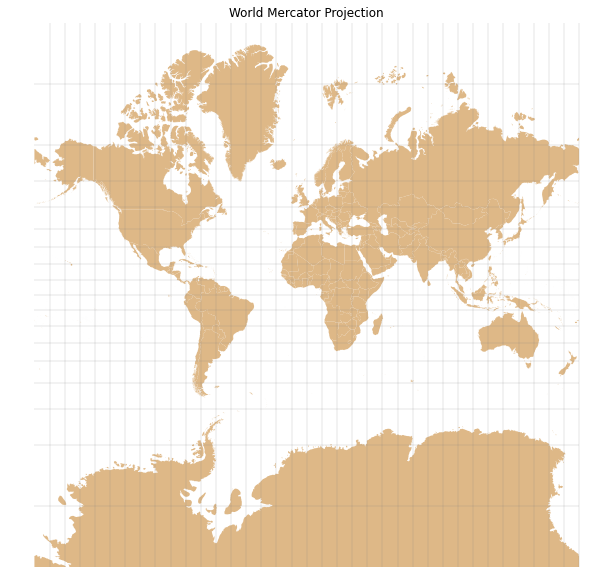

In [16]:
# Mercator projection truncated

gdf_world_mercator = gdf_countries.to_crs('EPSG:3857')
graticules_mercator = gdf_graticules.to_crs('EPSG:3857')
# gdf_world_mercator.plot(figsize=(12,30))

fig, ax = plt.subplots(figsize=(12,10))
gdf_world_mercator.plot(ax=ax, color='burlywood')
graticules_mercator.plot(ax=ax, color='gray', linewidth=0.2)

ax.axis('off')
ax.set_ylim(-20_000_000, 20_000_000)
plt.title('World Mercator Projection', color='black')

# Mollweide - equal area 'ESRI:54009'

Text(0.5, 1.0, 'World Mollweide Projection')

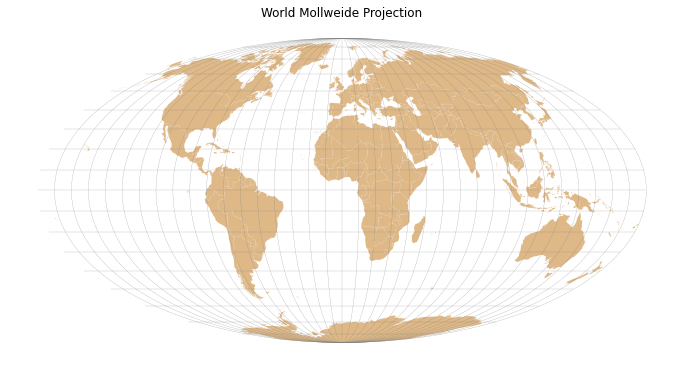

In [17]:
# Mollweide - equal area

# plt.rcParams['figure.facecolor'] = '#3b7197'
gdf_world_mollweide = gdf_countries.to_crs('ESRI:54009')
graticules_mollweide = gdf_graticules.to_crs('ESRI:54009')
fig, ax = plt.subplots(figsize=(12,10))

gdf_world_mollweide.plot(ax=ax, color='burlywood')
graticules_mollweide.plot(ax=ax, color='gray', linewidth=0.2)
ax.axis('off')
plt.title('World Mollweide Projection', color='black')

# Robinson ('ESRI:54030')

Text(0.5, 1.0, 'Robinson Projection')

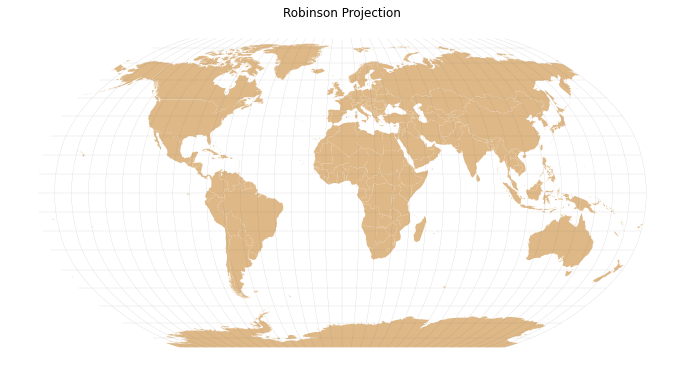

In [25]:
gdf_world_robinson = gdf_countries.to_crs('ESRI:54030')
gdf_grat_robinson = gdf_graticules.to_crs('ESRI:54030')
fig, ax = plt.subplots(figsize=(12,10))

gdf_world_robinson.plot(ax=ax, color='burlywood')
gdf_grat_robinson.plot(ax=ax, color='gray', linewidth=0.1)
ax.axis('off')
plt.title('Robinson Projection', color='black')

# show geometry option - calculating an area
# on a selected example, show to select an object. Mercator, plain and Mollweide
gdf_world_mollweide.geometry.area.sum()/1_000_000_000_000

Ukraine area: 603 628 km²

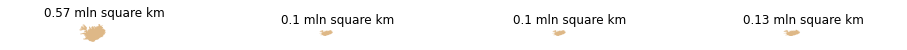

In [36]:
# Displaying Greenland (or Ukraine) in different projections, in the same scale

list_gdfs=[gdf_world_mercator, gdf_world_mollweide, gdf_world_robinson]

fig, axs = plt.subplots(1, len(list_gdfs), figsize=(len(list_gdfs)*4,8))

for ax, gdf in zip(axs, list_gdfs):
    gdf_cntr = gdf[gdf.shapeName=='Iceland']
    gdf_cntr.plot(ax=ax, color='burlywood', linewidth=0)
    ax.axis('off')
    ax.set_title(f'{round(gdf_cntr.geometry.area.values[0]/1_000_000_000_000, 2)} mln square km')
    ax.set_xlim(int(gdf_cntr.centroid.x) - 4_000_000, int(gdf_cntr.centroid.x) + 5_000_000)


In [21]:
# distances - more complicated matter

In [ ]:
import shapely
from shapely.geometry import Point, LineString

# distance - from Kiev to New York
kiev_coordinates = (30.52, 50.45)
ny_coordinates = (-73.94, 40.76)


In [40]:
point_kiev = Point(30.52, 50.45)
point_ny = Point(-73.94, 40.76)

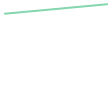

In [41]:
linia = LineString([point_kiev, point_ny])
linia

<Axes: >

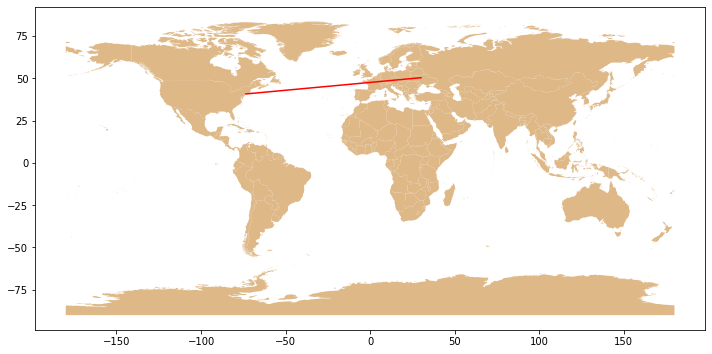

In [57]:
gdf_linia = gpd.GeoDataFrame(geometry=[linia], crs='epsg:4326')

fig, ax = plt.subplots(figsize=(12,10))
gdf_countries.plot(ax=ax, color='burlywood')
gdf_linia.plot(ax=ax, color='red')

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
gdf_world_mollweide.plot(ax=ax, color='burlywood')
gdf_linia.to_crs('ESRI:54009').plot(ax=ax, color='red')

In [81]:
print(gdf_linia.to_crs('ESRI:54009').geometry.length/1000, 
gdf_linia.to_crs('EPSG:3857').geometry.length/1000)

0    8606.878728
dtype: float64 0    11730.961165
dtype: float64


In [77]:
# custom CRS string - co oznazczaja po kolei - it will allow us to more del;iberetely look into coordinate systems 
crs_orig_point = (f'+proj=aeqd +datum=WGS84 +units=m +lat_0={point_kiev.y} +lon_0={point_kiev.x}')

gdf_linia = gdf_linia.set_crs('EPSG:4326')
gdf_linia_custom = gdf_linia.to_crs(crs_orig_point)
gdf_linia_custom = shapely.segmentize(gdf_linia_custom, 1000) # important to add vertices
gdf_linia_custom.set_crs(crs_orig_point, inplace=True)
gdf_linia_custom.geometry.length/1000

0    7523.966254
dtype: float64

(-16202833.720475351,
 19309647.77733567,
 -18909718.27737411,
 18801850.650062174)

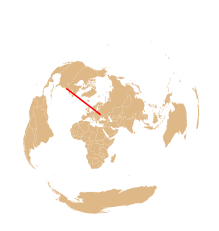

In [85]:
# plot a kiev centred map
gdf_countries_azimut = gdf_countries.to_crs(crs_orig_point)
graticules_azimut = gdf_graticules.to_crs(crs_orig_point)

fig, ax = plt.subplots()
gdf_countries_azimut.plot(ax=ax, color='burlywood')
gdf_linia_custom.plot(ax=ax, color='red')
ax.axis('off')

how the great circles look in popular map projections?

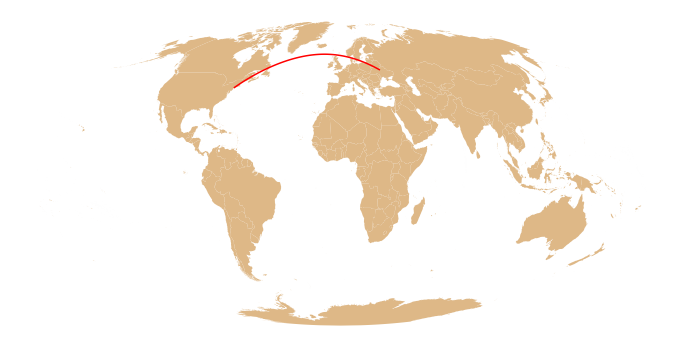

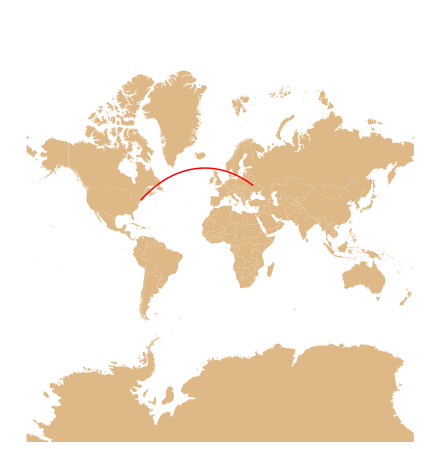

In [83]:
crss = ['ESRI:54009', 'EPSG:3857']
for crs in crss:
    fig, ax = plt.subplots(figsize=(12,8))
    gdf_countries_moll = gdf_countries.to_crs(crs)
    gdf_countries_moll.plot(ax=ax, color='burlywood')
    gdf_linia_custom.to_crs(crs).plot(ax=ax, linewidth=1.5, color='red')
    ax.axis('off')
    if crs == 'EPSG:3857':
        ax.set_ylim(-20_000_000, 25_000_000)